#SQL Design

We first want to design a sql database based on the problem. Based on our problem, we should decide what tables we need to store the data and how these tables are related to each other.

##Problem Description

if you are designing a database that will track information about books, you might have a table named "Titles" that stores information about each book, such as the book's title, date of publication, and publisher. There is also information that you might want to store about the publisher, such as the publisher's telephone number, address, and ZIP Code/Postal Code. If you were to store all this information in the "Titles" table, the publisher's telephone number would be duplicated for each title that the publisher prints.

A better solution is to store the publisher's information only one time, in a separate table that we will call "Publishers." You would then put a pointer in the "Titles" table that references an entry in the "Publishers" table.

To make sure that you data stays synchronized, you can enforce referential integrity between tables. Referential integrity relationships help make sure that information in one table matches information in another. For example, each title in the "Titles" table must be associated with a specific publisher in the "Publishers" table. A title cannot be added to the database for a publisher that does not exist in the database.

Logical relationships in a database enable you to efficiently query data and create reports.



## What is A Foreign Key?


A foreign key is a way to enforce referential integrity within your SQLite database. A foreign key means that values in one table must also appear in another table.

The referenced table is called the parent table while the table with the foreign key is called the child table. The foreign key in the child table will generally reference a primary key in the parent table.

A foreign key can only be defined in a CREATE TABLE statement.

## Cardinality and Optionality within Relationships





Relationship memberships are further defined by cardinality and optionality.



*   **Cardinality**:
Determines the number of entities on one side of the relationship that can be joined to a single entity on the other side.
*   **Optionality**: Specifies if entities on one side must be joined to an entity on the other side.

## A One-to-many Relationship

A one-to-many relationship is the most common kind of relationship. In this kind of relationship, a row in table A can have many matching rows in table B. But a row in table B can have only one matching row in table A. For example, the "Publishers" and "Titles" tables have a one-to-many relationship. That is, each publisher produces many titles. But each title comes from only one publisher.

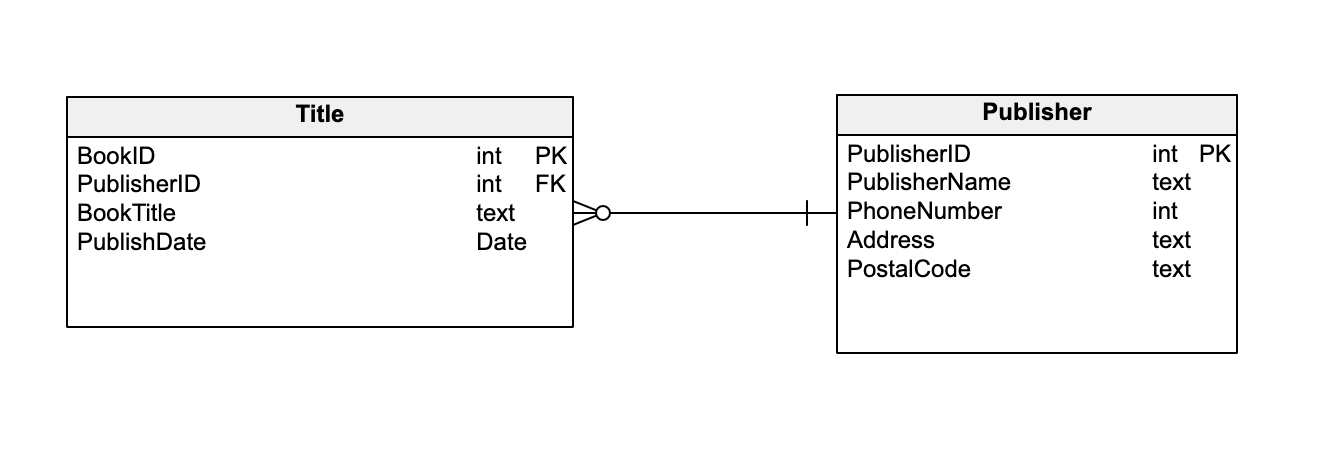

## A Many-to-Many Relationship

In a many-to-many relationship, a row in table A can have many matching rows in table B, and vice versa. You create such a relationship by defining a third table that is called a junction table. The primary key of the junction table consists of the foreign keys from both table A and table B. For example, the "Authors" table and the "Titles" table have a many-to-many relationship that is defined by a one-to-many relationship from each of these tables to the "TitleAuthors" table. The primary key of the "TitleAuthors" table is the combination of the AuthorID column (the "Authors" table's primary key) and the BookID column (the "Titles" table's primary key).

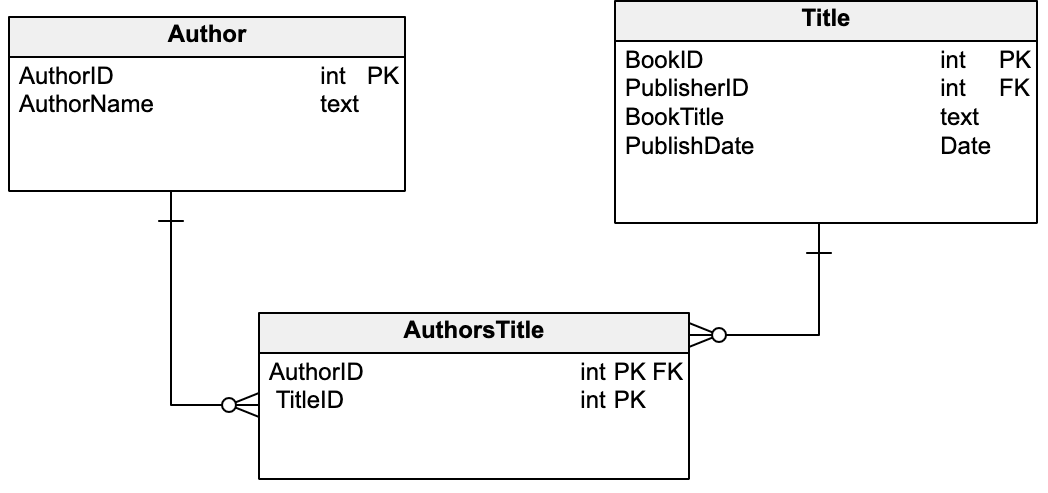


## A One-to-One Relationship

In a one-to-one relationship, a row in table A can have no more than one matching row in table B, and vice versa. A one-to-one relationship is created if both of the related columns are primary keys or have unique constraints.

This kind of relationship is not common, because most information that is related in this manner would be in one table. You might use a one-to-one relationship to take the following actions:

* Divide a table with many columns.
* Isolate part of a table for security reasons.
* Store data that is short-lived and could be easily deleted by deleting the table.
* Store information that applies only to a subset of the main table.

## Final ERD Diagram for the Library Problem


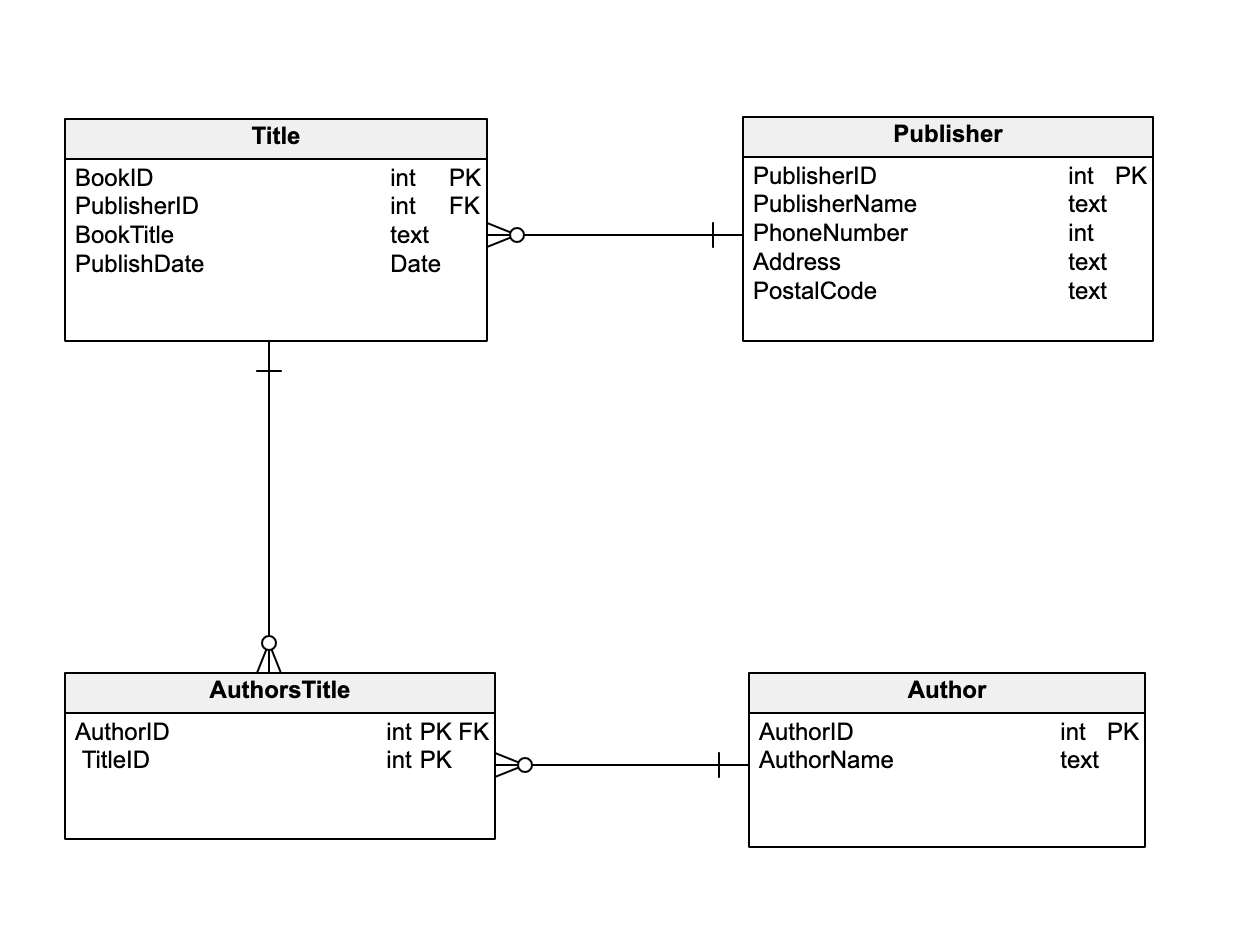

## Creating Databse Based on the SQL Design

In [ ]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


The `%load_extension` ... is an example of *magic* commands that are available of iPython environments such as Jupyter notebooks.

Here, we want to create a new database in our local filesystem and we use the relative file indexing to specify where the file is:

In [ ]:
%sql sqlite:///test.db

We get a message of success.

## Creating Tables

Now, let's create a table for each member and another table for the information for the games played by each member:

In [ ]:
%%sql

CREATE TABLE IF NOT EXISTS Authors (
  AuthorID      INTEGER PRIMARY KEY AUTOINCREMENT,
  name          TEXT);


CREATE TABLE IF NOT EXISTS Titles (
  BookID      INTEGER PRIMARY KEY AUTOINCREMENT,
  BookTitle   TEXT,
  PublishDate TEXT,
  PublisherID INTEGER,
  FOREIGN KEY (PublisherID) REFERENCES Publisher(PublisherID)
  );


  CREATE TABLE IF NOT EXISTS AuthorsTitle (
  AuthorID  INTEGER NOT NULL,
  TitleID INTEGER NOT NULL,
  FOREIGN KEY (AuthorID) REFERENCES Authors(AuthorID),
  FOREIGN KEY (TitleID) REFERENCES Titles(BookID),
  PRIMARY KEY (AuthorID, TitleID)
  );

  CREATE TABLE IF NOT EXISTS Publisher (
  PublisherID   INTEGER PRIMARY KEY,
  name          TEXT,
  Address       TEXT,
  PhoneNumber   Text,
  PostalCode    Text);




   sqlite:///dealershipDB.db
 * sqlite:///test.db
Done.
Done.
Done.
Done.


[]

In [ ]:
%%sql

PRAGMA table_info(AuthorsTitle)

   sqlite:///dealershipDB.db
 * sqlite:///test.db
Done.


[(0, 'AuthorID', 'INTEGER', 1, None, 1), (1, 'TitleID', 'INTEGER', 1, None, 2)]

## Now your turn

Now, it's you turn.
First design the database for the below problem and then create a database using the design.

Create an ERD for a dealership. The dealership sells both new and used cars, and it operates a service facility. Base your design on the following business rules:

* A salesperson may sell many cars, but each car is sold by only one salesperson.
* A customer may buy many cars, but each car is bought by only one customer.
* A salesperson writes a single invoice for each car he or she sells.
* A customer gets an invoice for each car he or she buys.
* A customer may come in just to have his or her car serviced; that is, a customer need not buy a car to be classified as a customer.
* When a customer takes one or more cars in for repair or service, one service ticket is written for each car.
* The car dealership maintains a service history for each of the cars serviced.
* The service  records are referenced by the car’s serial number.
* A car brought in for service can be worked on by many mechanics, and each mechanic may work on many cars.
* A car that is serviced may or may not need parts (e.g., adjusting a carburetor or cleaning a fuel injector nozzle does not require providing new parts).


To create your ERD diagram, you can use [this website](https://my.vertabelo.com/).

Please attach the ouptut of your ERD Diagram here.

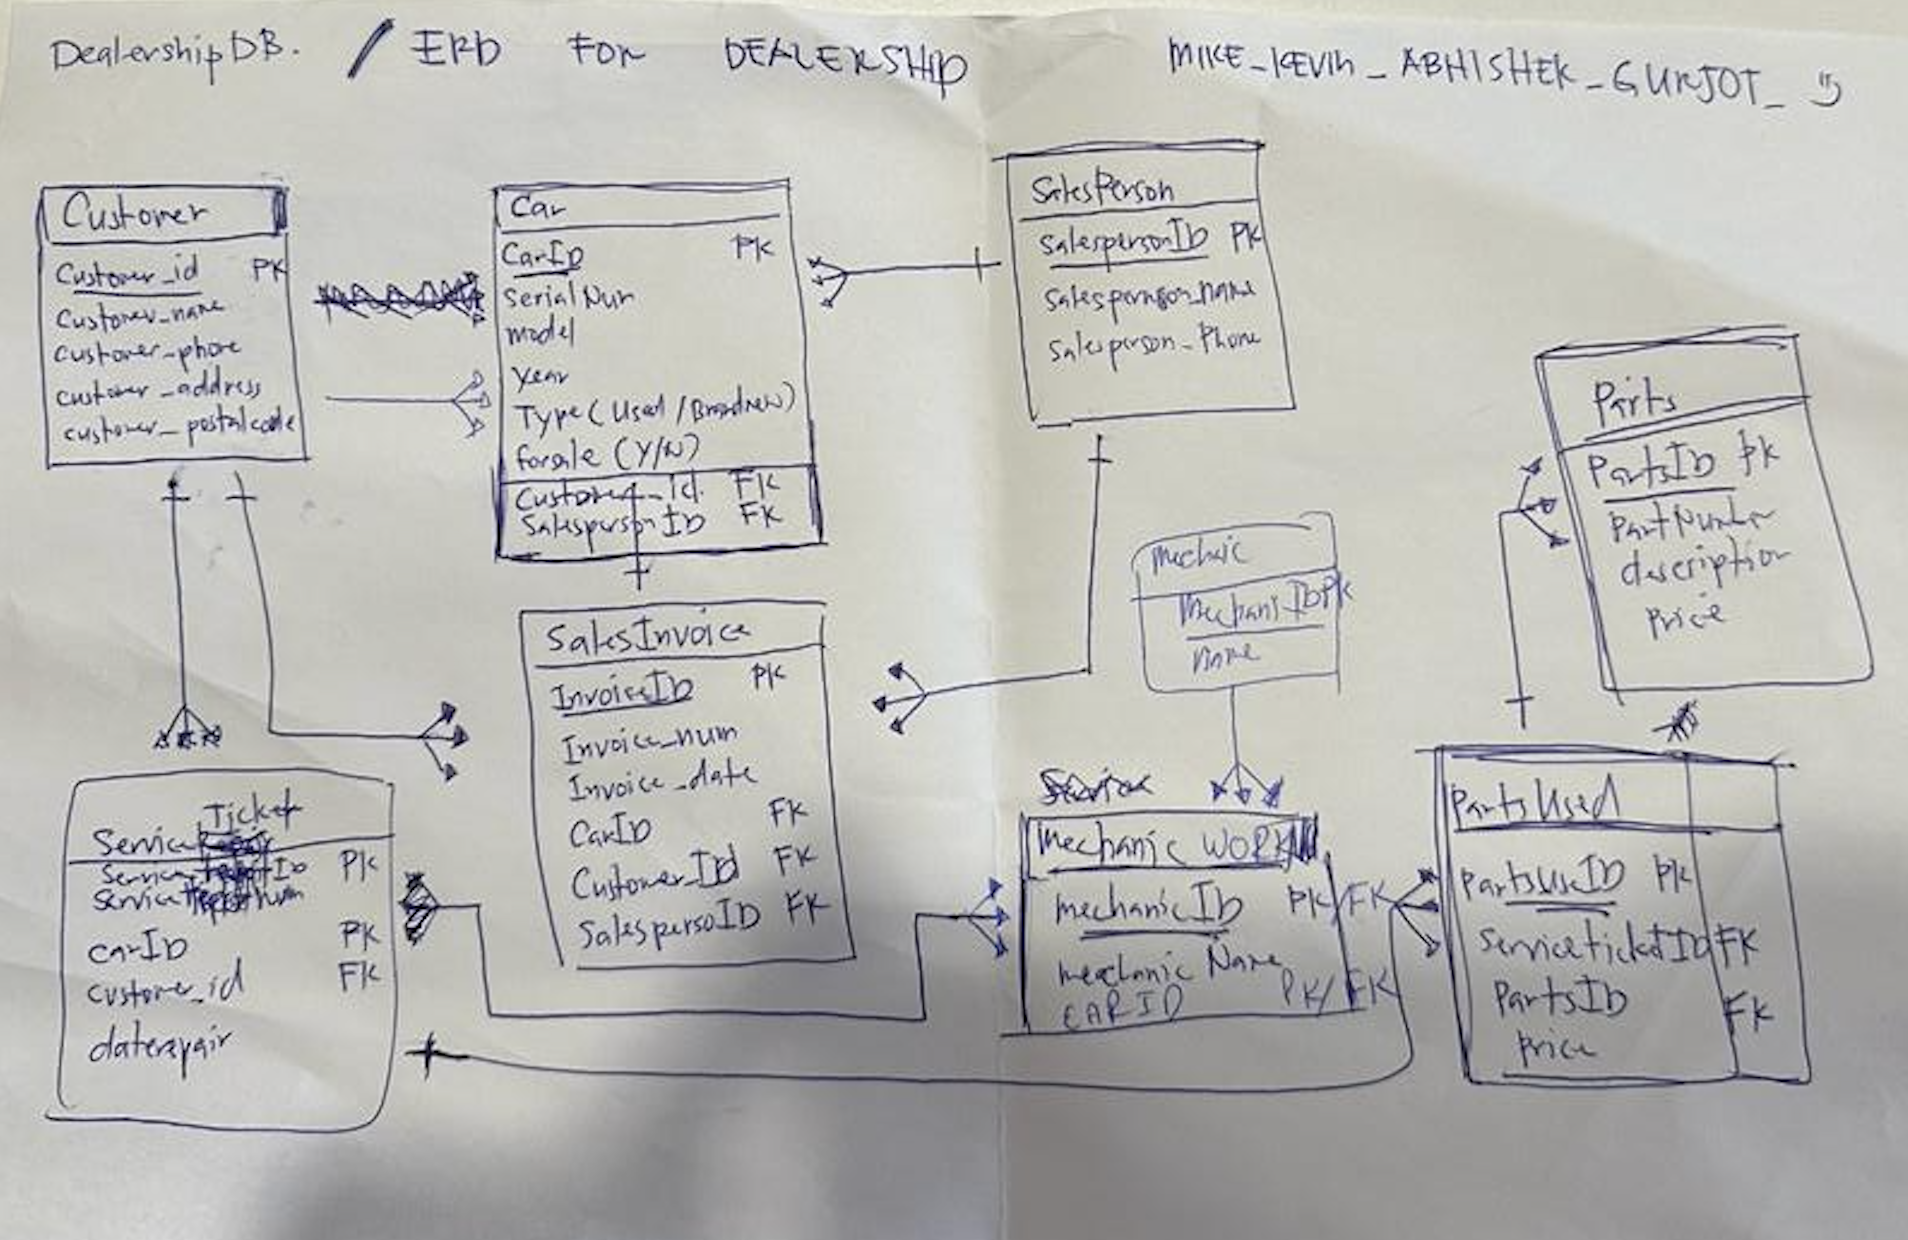

Now load sql extention and open a new database. Then, add the tables you need in this problem based on the SQL design.

In [ ]:
# your code goes here!

%sql sqlite:///dealershipDB.db

In [ ]:
%%sql

  CREATE TABLE IF NOT EXISTS SalesPerson (
  SalesPersonID INTEGER PRIMARY KEY AUTOINCREMENT,
  Name          TEXT,
  PhoneNumber   INTEGER
  );

  CREATE TABLE IF NOT EXISTS Customer (
  CustomerID    INTEGER PRIMARY KEY AUTOINCREMENT,
  Name          TEXT,
  Address       TEXT,
  PhoneNumber   INTEGER
  );

  CREATE TABLE IF NOT EXISTS Mechanic (
  MechanicID     INTEGER PRIMARY KEY,
  MechanicName   TEXT
  );

  CREATE TABLE IF NOT EXISTS Parts (
  PartsID           INTEGER PRIMARY KEY,
  PartNumber        INTEGER,
  PartDescription   TEXT,
  PartPrice         REAL
  );

  CREATE TABLE IF NOT EXISTS Car (
  CarSerialNumber  INTEGER PRIMARY KEY,
  Model   TEXT,
  Year    TEXT,
  Type    TEXT,
  ForSale TEXT,
  CustomerID INTEGER,
  SalesPersonID INTEGER,
  FOREIGN KEY (CustomerID) REFERENCES Customer(CustomerID),
  FOREIGN KEY (SalesPersonID) REFERENCES SalesPerson(SalesPersonID)
  );

  CREATE TABLE IF NOT EXISTS ServiceTicket (
  ServiceTicketID   INTEGER PRIMARY KEY,
  Service_name      TEXT,
  Description       TEXT,
  DateRepair       DATE,
  CustomerID INTEGER,
  CarSerialNumber INTEGER,
  FOREIGN KEY (CustomerID) REFERENCES Customer(CustomerID),
  FOREIGN KEY (CarSerialNumber) REFERENCES Car(CarSerialNumber)
  );

  CREATE TABLE IF NOT EXISTS SalesInvoice (
  SalesInvoiceID   INTEGER PRIMARY KEY,
  Invoicename      TEXT,
  InvoiceDate       DATE,
  TotalAmount       REAL,
  CustomerID INTEGER,
  CarSerialNumber INTEGER,
  SalesPersonID INTEGER,
  FOREIGN KEY (CustomerID) REFERENCES Customer(CustomerID),
  FOREIGN KEY (SalesPersonID) REFERENCES SalesPerson(SalesPersonID),
  FOREIGN KEY (CarSerialNumber) REFERENCES Car(CarSerialNumber)
  );

  CREATE TABLE IF NOT EXISTS MechanicWorks (
  MechanicID      INTEGER NOT NULL,
  MechanicName    TEXT,
  CarSerialNumber INTEGER NOT NULL,
  FOREIGN KEY (MechanicID) REFERENCES Mechanic(MechanicID),
  FOREIGN KEY (CarSerialNumber) REFERENCES Car(CarSerialNumber),
  PRIMARY KEY (MechanicID, CarSerialNumber)
  );

  CREATE TABLE IF NOT EXISTS PartsUsed (
  PartsID           INTEGER NOT NULL,
  ServiceTicketID   INTEGER NOT NULL,
  FOREIGN KEY (PartsID) REFERENCES Parts(PartsID),
  FOREIGN KEY (ServiceTicketID) REFERENCES ServiceTicket(ServiceTicketID)
  );

 * sqlite:///dealershipDB.db
   sqlite:///test.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [ ]:
%%sql
PRAGMA table_info(SalesPerson)

 * sqlite:///dealershipDB.db
   sqlite:///test.db
Done.


[(0, 'SalesPersonID', 'INTEGER', 0, None, 1),
 (1, 'Name', 'TEXT', 0, None, 0),
 (2, 'PhoneNumber', 'INTEGER', 0, None, 0)]

In [ ]:
%%sql
PRAGMA table_info(Customer)

 * sqlite:///dealershipDB.db
   sqlite:///test.db
Done.


[(0, 'CustomerID', 'INTEGER', 0, None, 1),
 (1, 'Name', 'TEXT', 0, None, 0),
 (2, 'Address', 'TEXT', 0, None, 0),
 (3, 'PhoneNumber', 'INTEGER', 0, None, 0)]

In [ ]:
%%sql
PRAGMA table_info(Mechanic)

 * sqlite:///dealershipDB.db
   sqlite:///test.db
Done.


[(0, 'MechanicID', 'INTEGER', 0, None, 1),
 (1, 'MechanicName', 'TEXT', 0, None, 0)]

In [ ]:
%%sql
PRAGMA table_info(Car)

 * sqlite:///dealershipDB.db
   sqlite:///test.db
Done.


[(0, 'CarSerialNumber', 'INTEGER', 0, None, 1),
 (1, 'Model', 'TEXT', 0, None, 0),
 (2, 'Year', 'TEXT', 0, None, 0),
 (3, 'Type', 'TEXT', 0, None, 0),
 (4, 'ForSale', 'TEXT', 0, None, 0),
 (5, 'CustomerID', 'INTEGER', 0, None, 0),
 (6, 'SalesPersonID', 'INTEGER', 0, None, 0)]

In [ ]:
%%sql
PRAGMA table_info(Parts)

 * sqlite:///dealershipDB.db
   sqlite:///test.db
Done.


[(0, 'PartsID', 'INTEGER', 0, None, 1),
 (1, 'PartNumber', 'INTEGER', 0, None, 0),
 (2, 'PartDescription', 'TEXT', 0, None, 0),
 (3, 'PartPrice', 'REAL', 0, None, 0)]

In [ ]:
%%sql
PRAGMA table_info(ServiceTicket)

 * sqlite:///dealershipDB.db
   sqlite:///test.db
Done.


[(0, 'ServiceTicketID', 'INTEGER', 0, None, 1),
 (1, 'Service_name', 'TEXT', 0, None, 0),
 (2, 'Description', 'TEXT', 0, None, 0),
 (3, 'DateRepair', 'DATE', 0, None, 0),
 (4, 'CustomerID', 'INTEGER', 0, None, 0),
 (5, 'CarSerialNumber', 'INTEGER', 0, None, 0)]

In [ ]:
%%sql
PRAGMA table_info(SalesInvoice)

 * sqlite:///dealershipDB.db
   sqlite:///test.db
Done.


[(0, 'SalesInvoiceID', 'INTEGER', 0, None, 1),
 (1, 'Invoicename', 'TEXT', 0, None, 0),
 (2, 'InvoiceDate', 'DATE', 0, None, 0),
 (3, 'TotalAmount', 'REAL', 0, None, 0),
 (4, 'CustomerID', 'INTEGER', 0, None, 0),
 (5, 'CarSerialNumber', 'INTEGER', 0, None, 0),
 (6, 'SalesPersonID', 'INTEGER', 0, None, 0)]

In [ ]:
%%sql
PRAGMA table_info(MechanicWorks)

 * sqlite:///dealershipDB.db
   sqlite:///test.db
Done.


[(0, 'MechanicID', 'INTEGER', 1, None, 1),
 (1, 'MechanicName', 'TEXT', 0, None, 0),
 (2, 'CarSerialNumber', 'INTEGER', 1, None, 2)]

In [ ]:
%%sql
PRAGMA table_info(PartsUsed)

 * sqlite:///dealershipDB.db
   sqlite:///test.db
Done.


[(0, 'PartsID', 'INTEGER', 1, None, 0),
 (1, 'ServiceTicketID', 'INTEGER', 1, None, 0)]